In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing

pd.set_option('display.max_colwidth', None)


In [10]:
# Load the classifier from the file
with open('../../../../../Training/LGBM/lgbm_model_with_stopwords.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

# load the vectorizer from file
with open('../../../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

LGBMClassifier(num_leaves=300)
TfidfVectorizer()


In [7]:
df_test_lgbm_with_stopwords = pd.read_csv('../../../../../Data-Preparation/Twitter-Corpus/full_corpus_preprocessed.csv')

In [11]:
# astype(str) is necesarry 
X = loaded_vectorizer.transform(df_test_lgbm_with_stopwords['Text'].astype(str))

In [12]:
# predict the sentiment
df_test_lgbm_with_stopwords['Prediction'] = classifier.predict(X)
df_test_lgbm_with_stopwords.head()

,target,Text,target_number,Prediction
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4,0
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4,4
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4,4
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4,4
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4,4


In [17]:
# calculate metrics
accuracy = accuracy_score(df_test_lgbm_with_stopwords['target_number'], df_test_lgbm_with_stopwords['Prediction'])
precision = precision_score(df_test_lgbm_with_stopwords['target_number'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
recall = recall_score(df_test_lgbm_with_stopwords['target_number'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
f1 = f1_score(df_test_lgbm_with_stopwords['target_number'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)

# visualize metrics
print('LGBM')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print()


LGBM
Accuracy: 0.74
Precision: 0.70
Recall: 0.85
F1 Score: 0.76



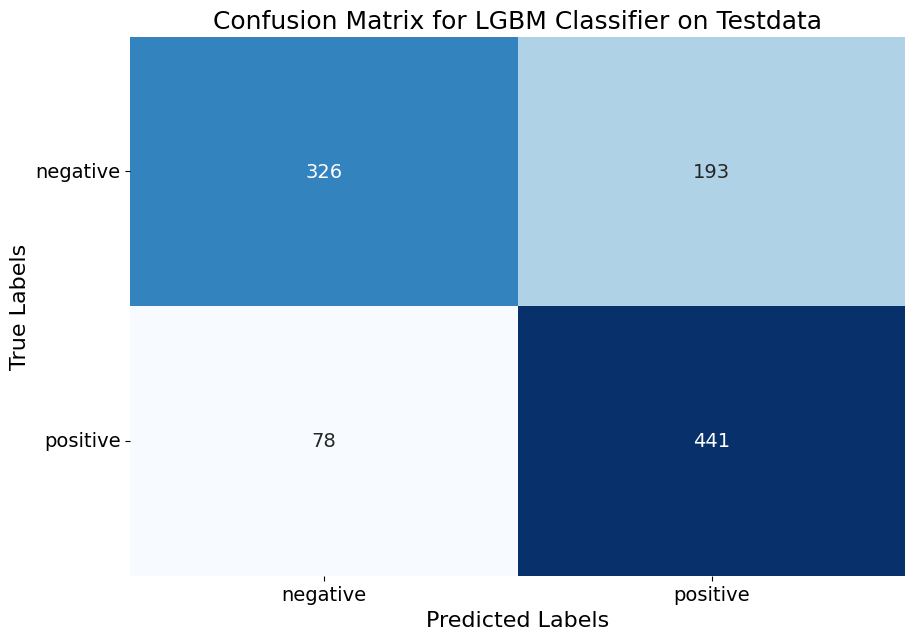

In [15]:
cm_nb = confusion_matrix(df_test_lgbm_with_stopwords['target_number'], df_test_lgbm_with_stopwords['Prediction'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier on Testdata', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()